# Problem Statement

Based on the Pima Indians Hospital diabetes data , build Machine Learning binary classification model to predict if the person is diabetic or Not?

--> __Variables

* Pregnancies	
* Glucose	
* BloodPressure	
* SkinThickness	
* Insulin	
* BMI	
* DiabetesPedigreeFunction	
* Age	

-->__Label/Target

* Outcome

0 - Normal

1 - Diabetic  

Refer SKlearn official Documnetation if yor are sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

In [386]:
#Lets Start with importing necessary Libraries 


import pandas as pd
import numpy as np


#For Data Visualization


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

# For Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score, precision_score
from sklearn.metrics import recall_score, classification_report

# Importing Dataset Diabetes

In [387]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [388]:
data.shape

(768, 9)

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [390]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [391]:
# Pre-Processing

In [392]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [393]:
data.duplicated().sum()

0

In [394]:
# Analysis (EDA)
#Lets see how data is distributed for every column.

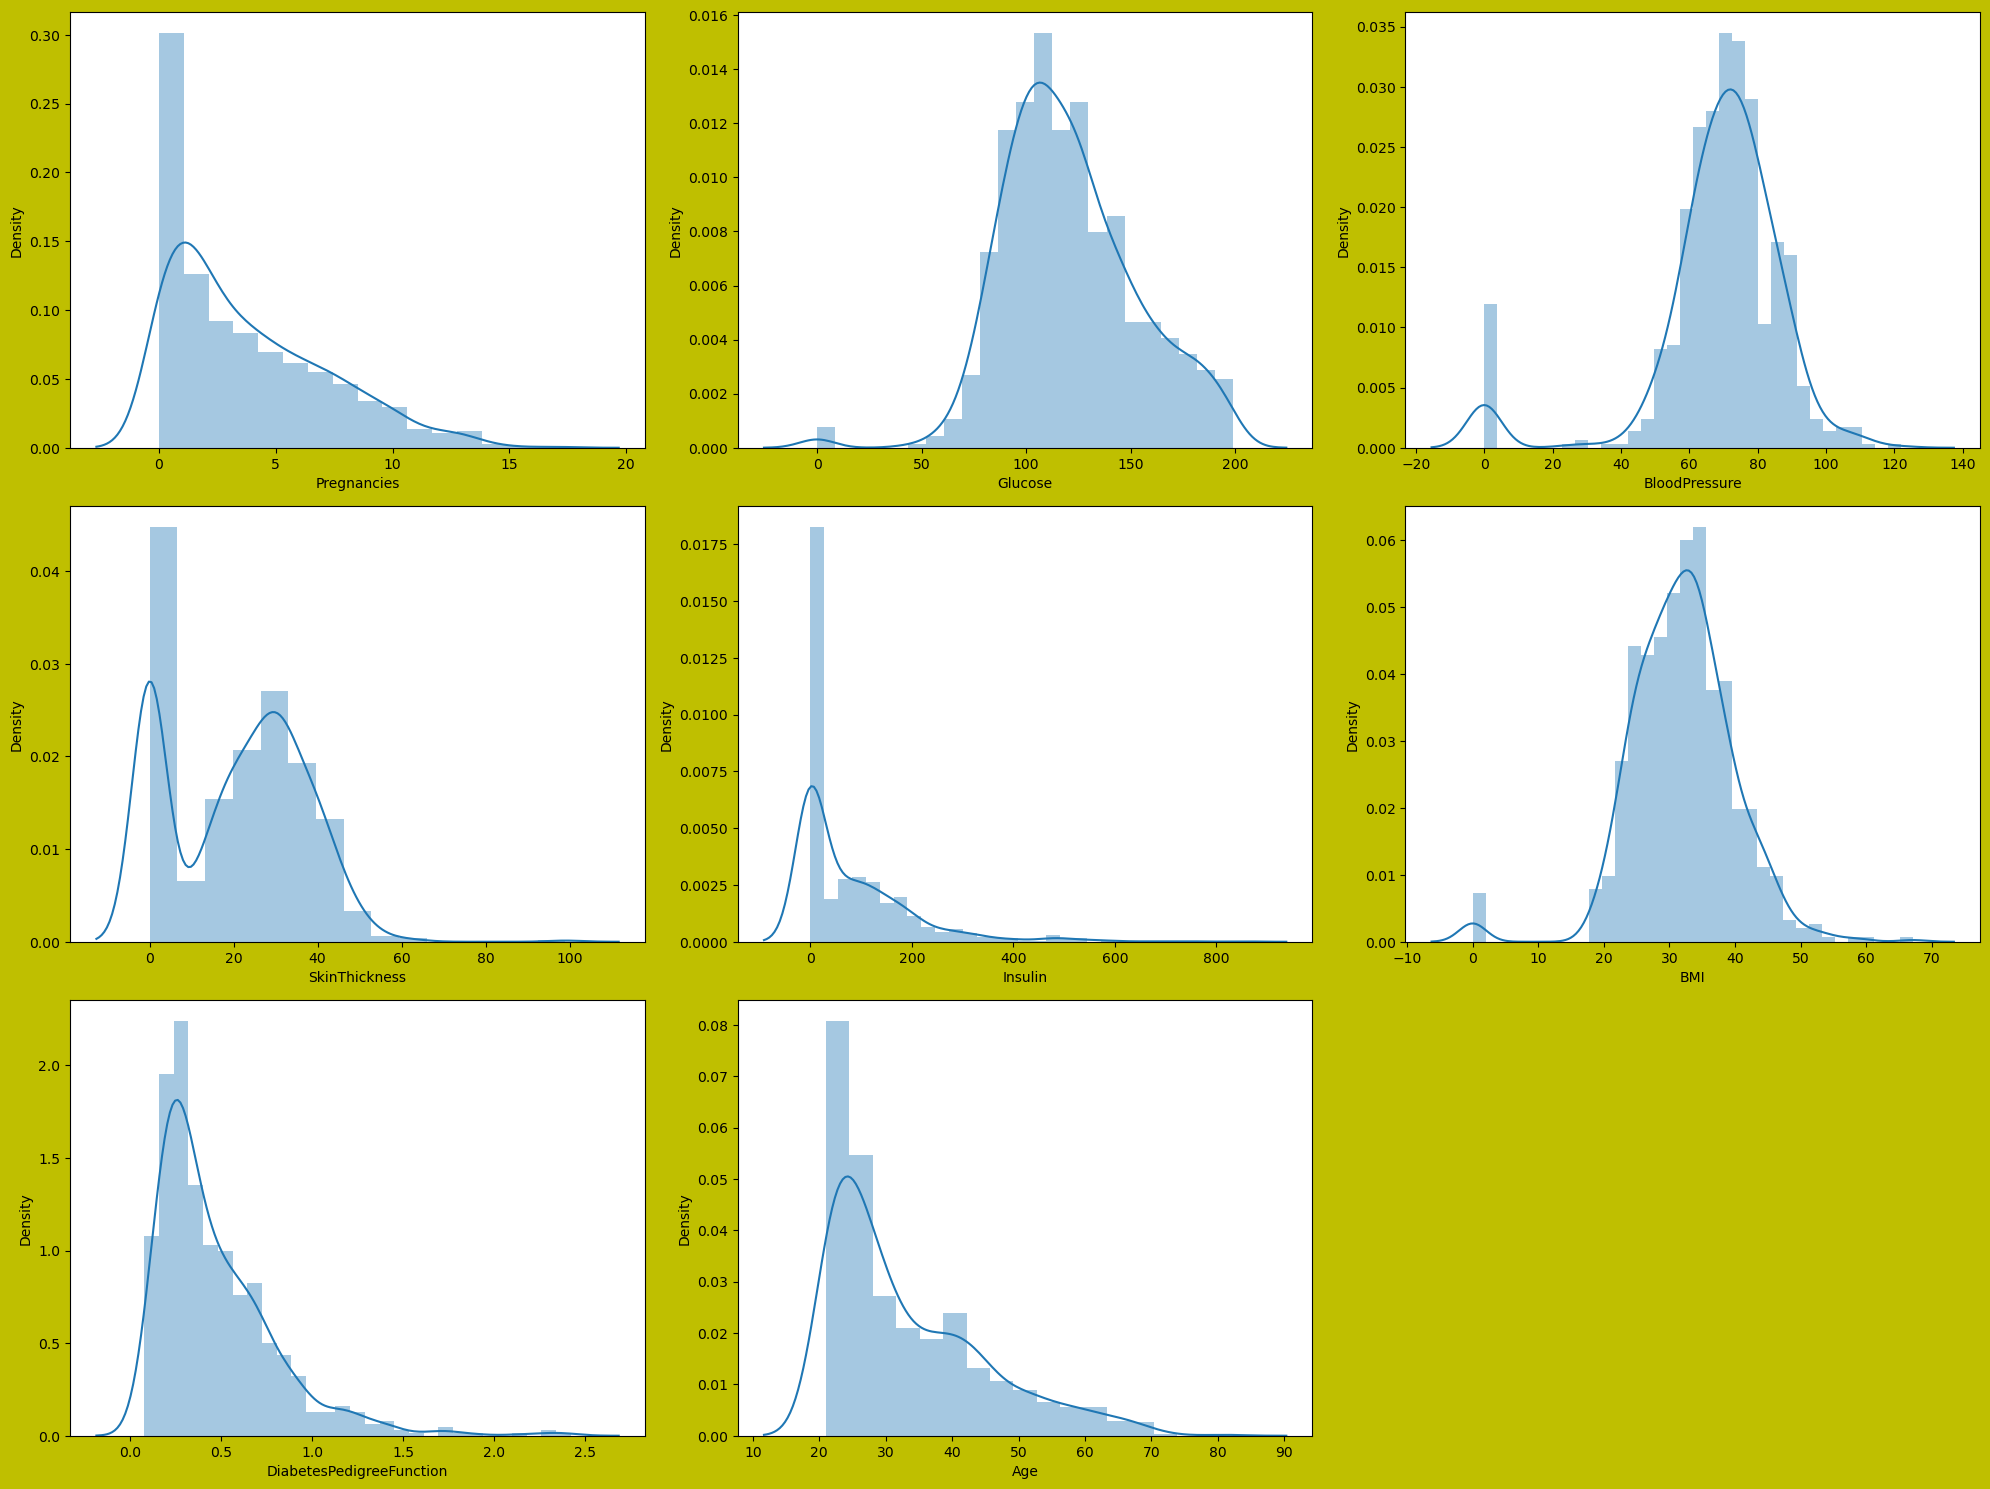

In [395]:
plt.figure(figsize=(20,15),facecolor='y')
graph=1
for i in data:
    if graph <=8:
        ax=plt.subplot(3,3,graph)
        sns.distplot(data[i])
        plt.xlabel(i)
    graph +=1
plt.tight_layout()

* We can clearly see, there is some skewness is present in the data, lets deal with data.

Also we can see that few data for columns Glucose , insulin , skin thickness , BMI and Blood Pressure  having value 0 which is not possible.You can do a quick research to see that one cannot have 0 value for these.

Lets deal with that, we can either remove such data or simply replace it with their respective mean values. 

In [396]:
# replacing zero values with the mean of the column.
# I am going to use low risk method which is mean method.
# treating zeros

In [397]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

* Now, lets see data distribution again

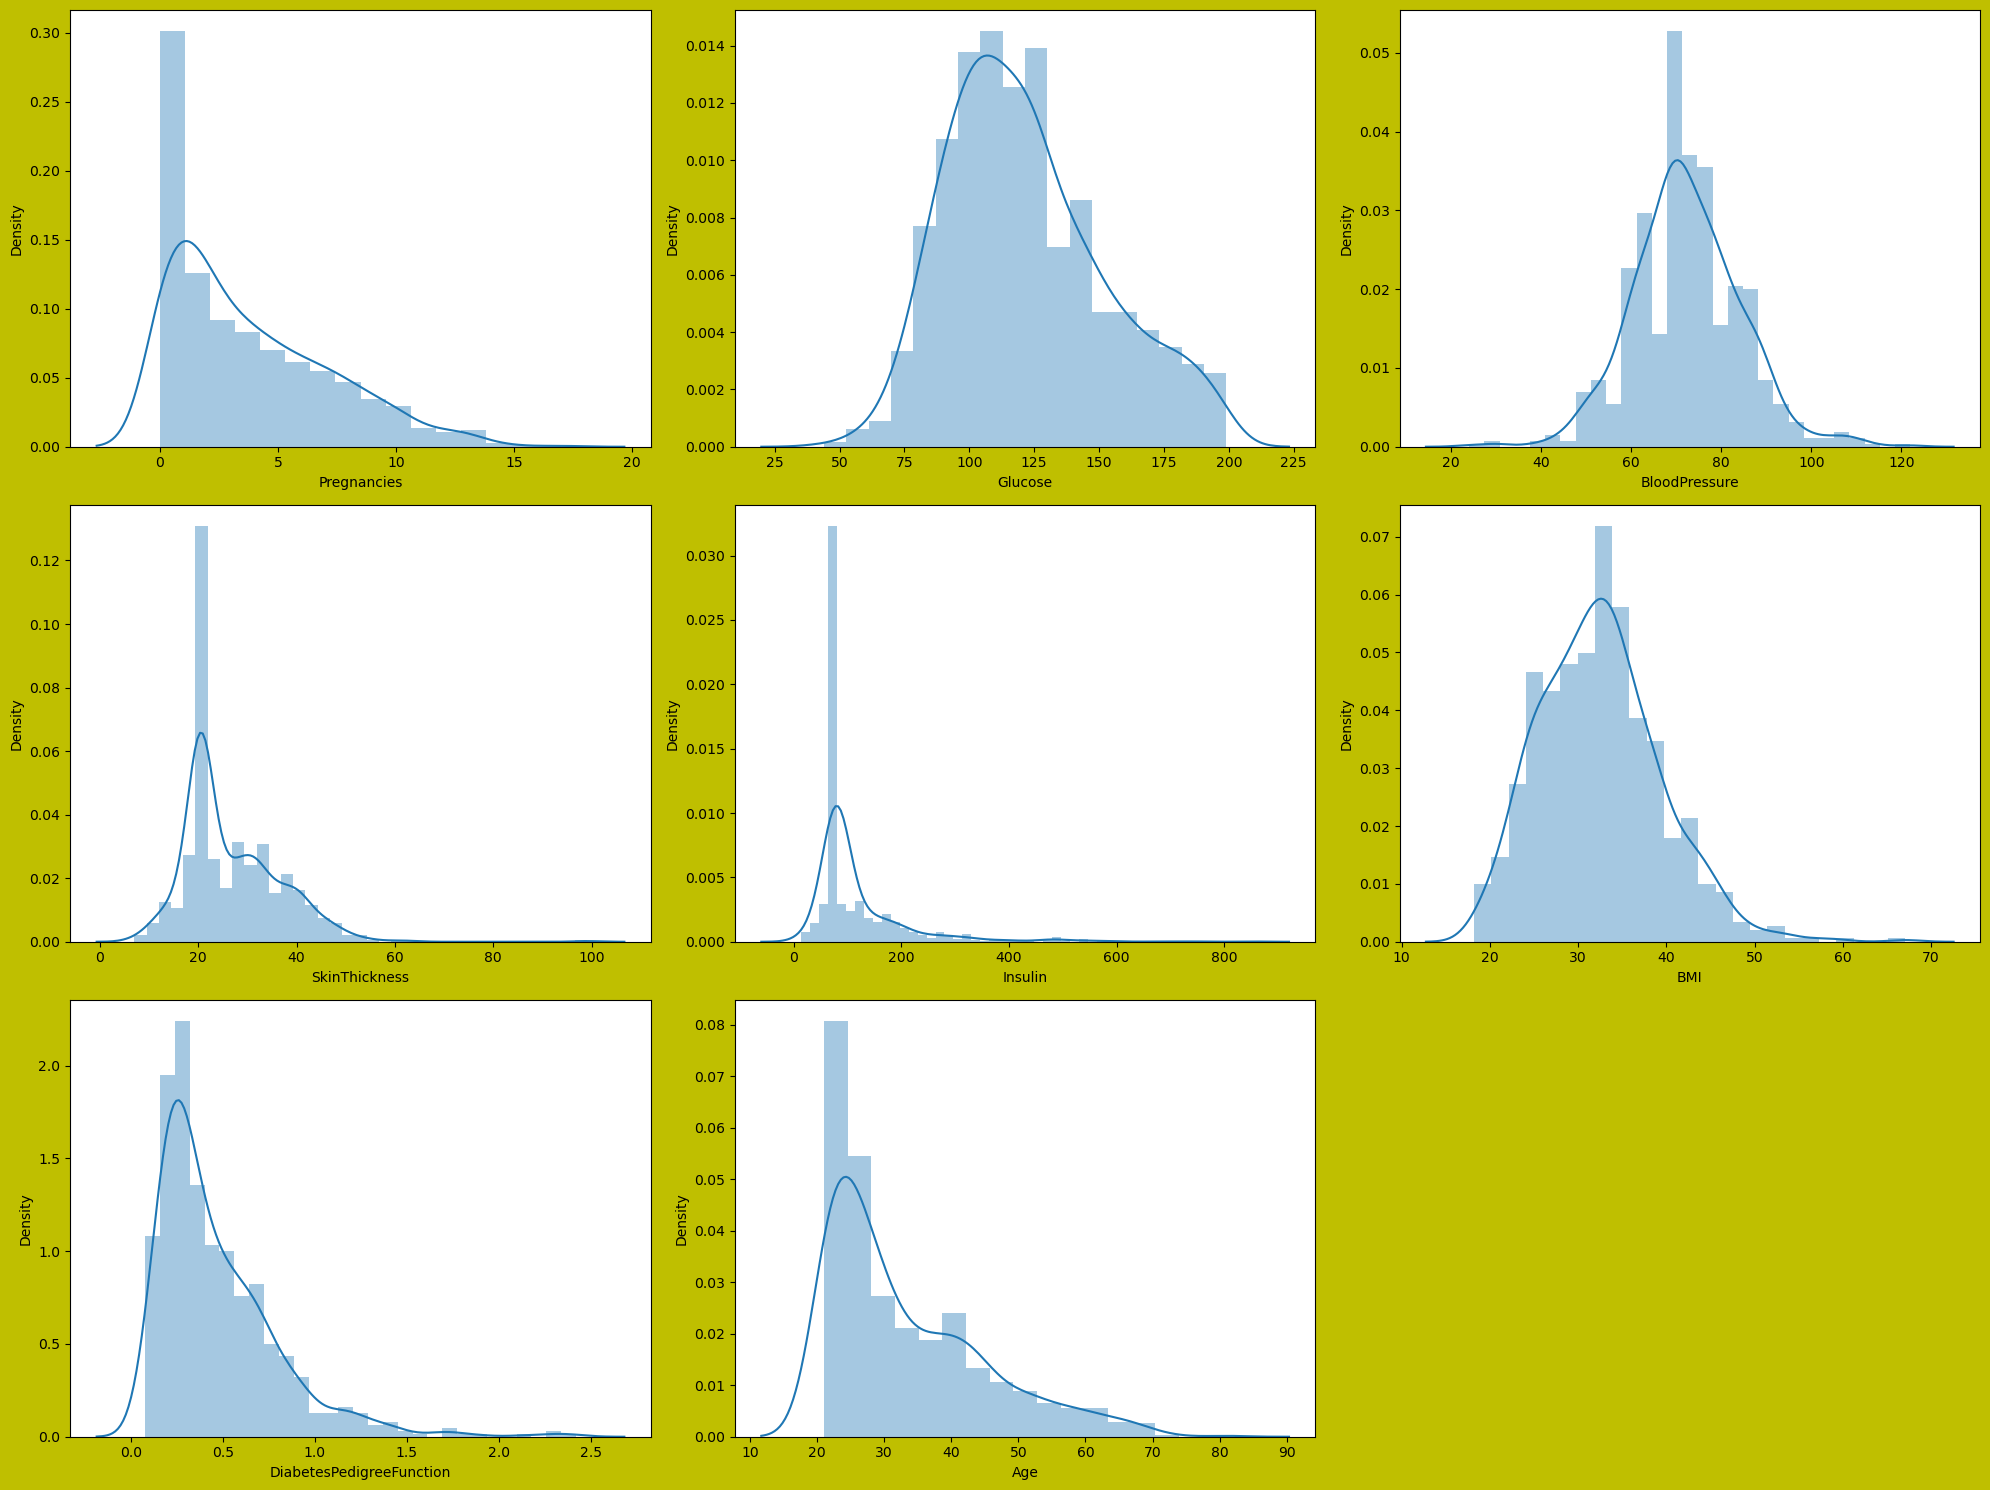

In [398]:
plt.figure(figsize=(20,15),facecolor='y')
graph=1
for i in data:
    if graph <=8:
        ax=plt.subplot(3,3,graph)
        sns.distplot(data[i])
        plt.xlabel(i)
    graph +=1
plt.tight_layout()

* Now it's look better, but there are still outliers present in some column.

Lets deal with them: 

In [399]:
# Visualize the outliers using boxplot

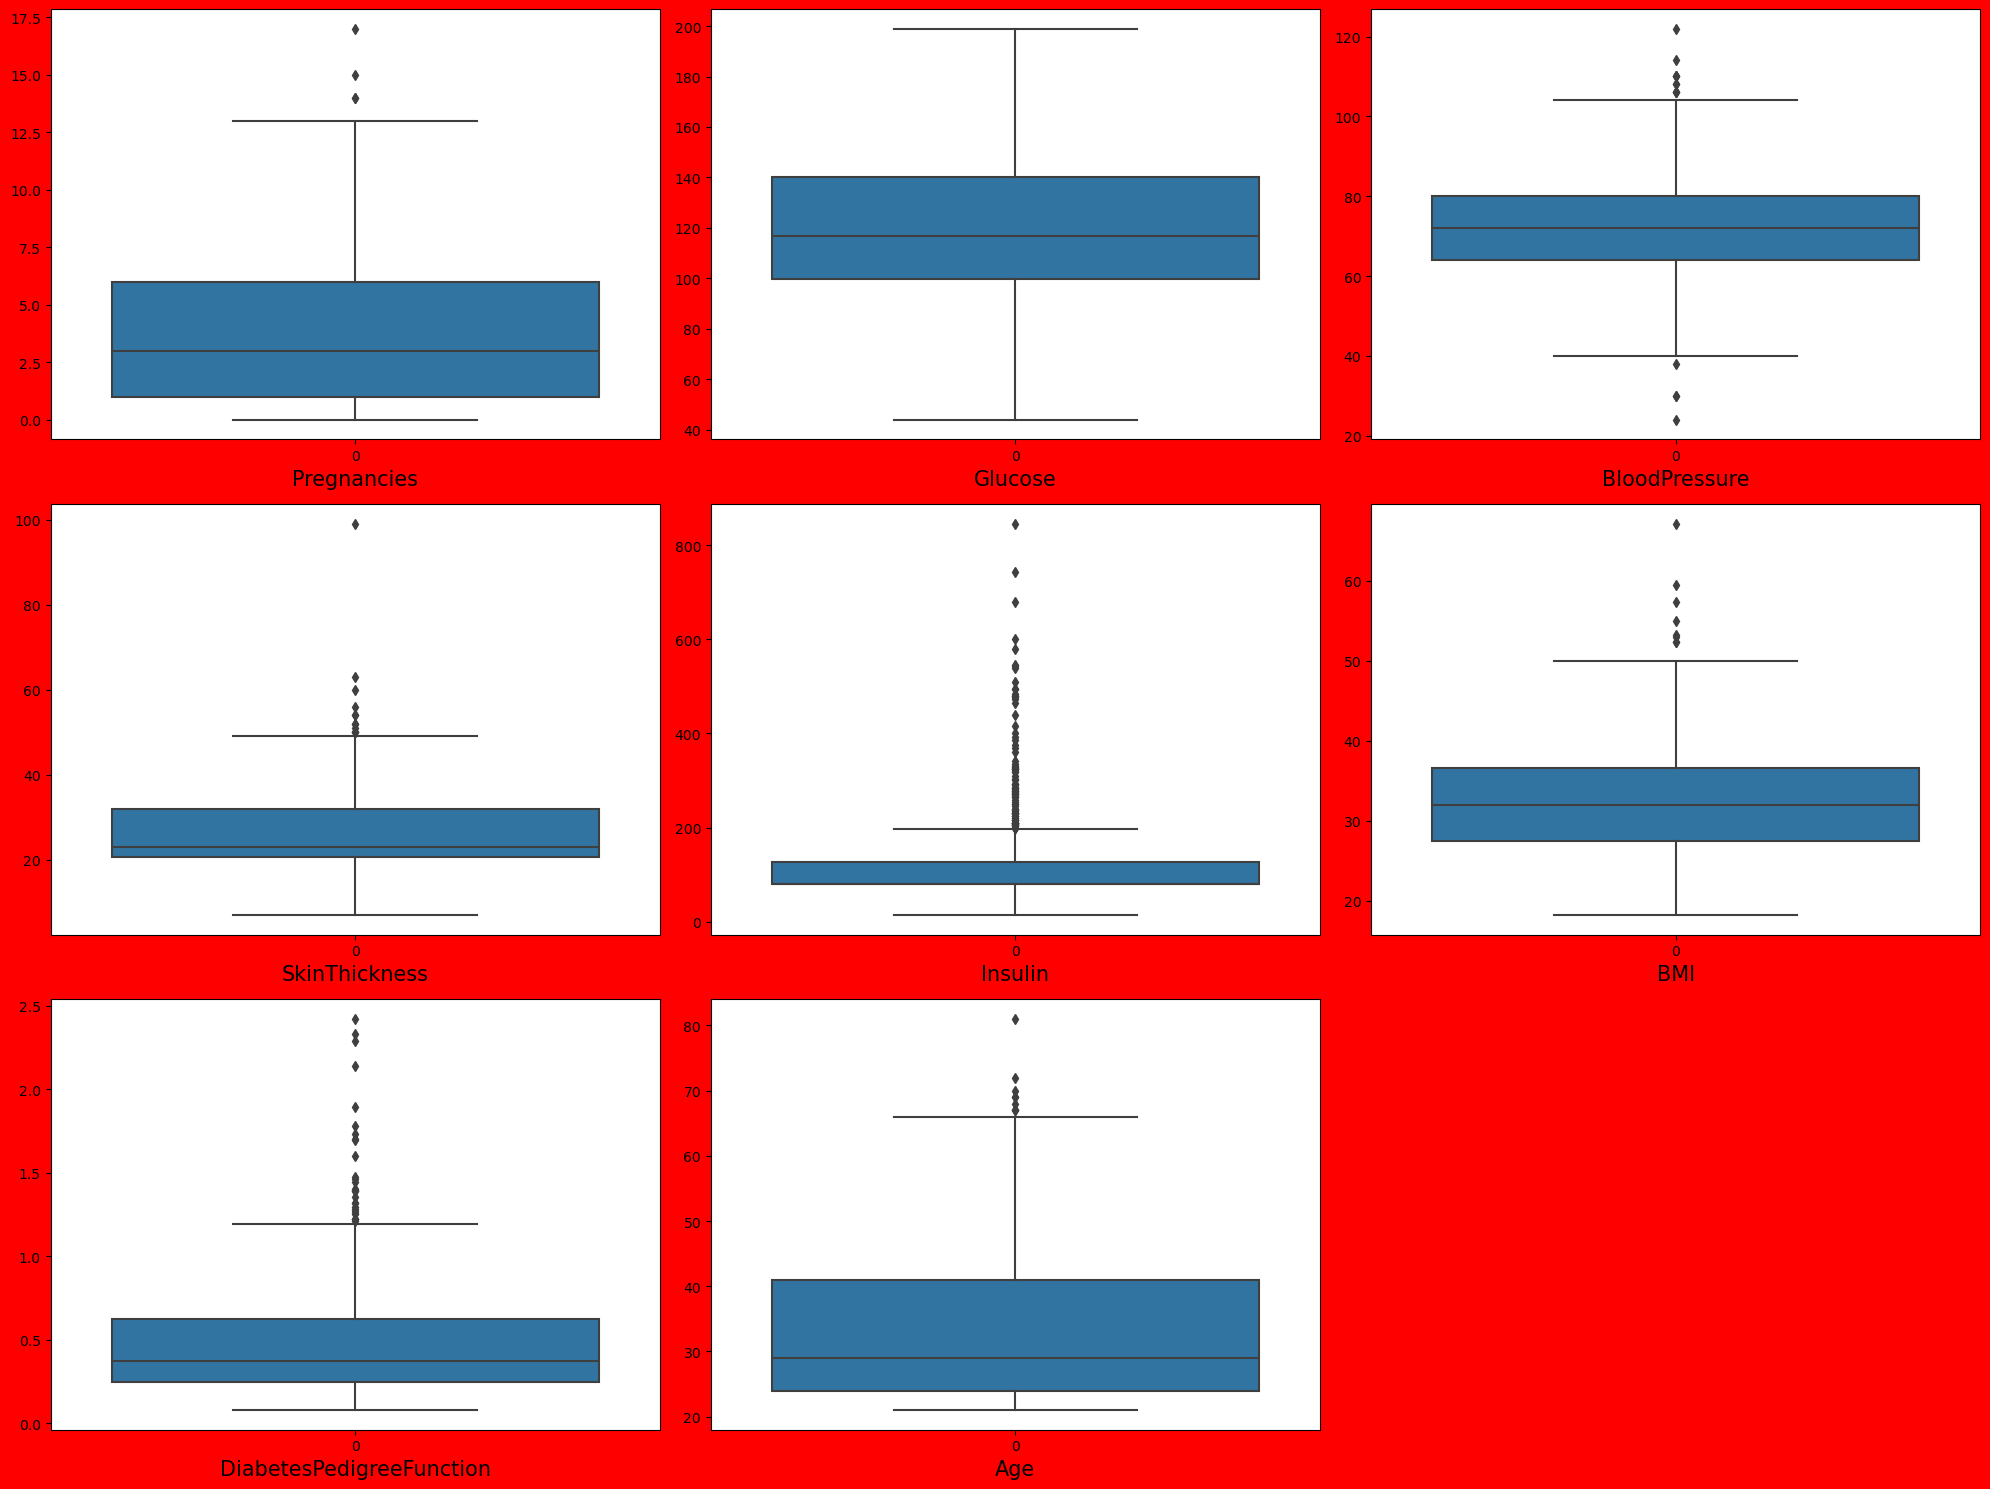

In [400]:
plt.figure(figsize=(20,15),facecolor='r')
plotnumber=1
for i in data:
    if plotnumber <=8:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber +=1
plt.tight_layout()

* Finding the IQR (Inter Quantile Range) to identify outliers

In [401]:
#1st quantile 

q1 = data.quantile(0.25)
q1

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

In [402]:
q3 = data.quantile(0.75)
q3

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

In [403]:
# IQR Formula:
 
IQR = q3  - q1
IQR

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64

# Outliers Detection Formula

* Upper Cut-off ==> Q3 + (1.5 * IQR)
* Lower Cut-off ==> Q1 - (1.5 * IQR)

In [404]:
# Detecting outlier for pregnencies variable 

print("p0   = ",data.Pregnancies.min())
print("p25  = ",data.Pregnancies.quantile(0.25))
print("p50  = ",data.Pregnancies.median())
print("p75  = ",data.Pregnancies.quantile(0.75))
print("p100 = ",data.Pregnancies.max())
print("LC   = ",data.Pregnancies.quantile(0.25)-1.5*IQR.Pregnancies)
print("UC   = ",data.Pregnancies.quantile(0.75)+1.5*IQR.Pregnancies)

p0   =  0
p25  =  1.0
p50  =  3.0
p75  =  6.0
p100 =  17
LC   =  -6.5
UC   =  13.5


In [405]:
# Here, we clearly see that there is a Outlier present in the Pregnancies variable at Upper Cut-off.
# Treatment of Outlier :

data.Pregnancies.clip(upper = data.Pregnancies.quantile(0.75)+1.5*IQR.Pregnancies,inplace=True)

# here we are not dropping that observation (outlier datapoint), we are just replacing it with UC 
# because dataset is small.

In [406]:
# In glucose variable, we can see that there is no outlier present by the help of Boxplot.

In [407]:
# Detecting outlier for Blood Pressure variable 

print("p0   = ",data.BloodPressure.min())
print("p25  = ",data.BloodPressure.quantile(0.25))
print("p50  = ",data.BloodPressure.median())
print("p75  = ",data.BloodPressure.quantile(0.75))
print("p100 = ",data.BloodPressure.max())
print("LC   = ",data.BloodPressure.quantile(0.25)-1.5*IQR.BloodPressure)
print("UC   = ",data.BloodPressure.quantile(0.75)+1.5*IQR.BloodPressure)

p0   =  24.0
p25  =  64.0
p50  =  72.0
p75  =  80.0
p100 =  122.0
LC   =  40.0
UC   =  104.0


In [408]:
# Here, we clearly see that there is a Outlier present in the Blood Pressure variable at 
# Upper Cut-off and Lower Cut-off but we consider only lower one because this is Domain specific thing.
# Treatment of Outlier :

data.BloodPressure.clip(lower = data.BloodPressure.quantile(0.25)-1.5*IQR.BloodPressure,
                        upper=data.BloodPressure.quantile(0.75)+1.5*IQR.BloodPressure,inplace=True)

# here we are not dropping that observation (outlier datapoint), we are just replacing it with UC 
# because dataset is small.

In [409]:
# Detecting outlier for Skin Thickness variable 

print("p0   = ",data.SkinThickness.min())
print("p25  = ",data.SkinThickness.quantile(0.25))
print("p50  = ",data.SkinThickness.median())
print("p75  = ",data.SkinThickness.quantile(0.75))
print("p100 = ",data.SkinThickness.max())
print("LC   = ",data.SkinThickness.quantile(0.25)-1.5*IQR.SkinThickness)
print("UC   = ",data.SkinThickness.quantile(0.75)+1.5*IQR.SkinThickness)

p0   =  7.0
p25  =  20.536458333333332
p50  =  23.0
p75  =  32.0
p100 =  99.0
LC   =  3.341145833333332
UC   =  49.1953125


In [410]:
# Here, we clearly see that there is a Outlier present in the Skin Thickness variable at Upper Cut-off.
# Treatment of Outlier :

data.SkinThickness.clip(upper = data.SkinThickness.quantile(0.75)+1.5*IQR.SkinThickness,inplace=True)

# here we are not dropping that observation (outlier datapoint), we are just replacing it with UC 
# because dataset is small.

In [411]:
# Detecting outlier for Insulin variable 

print("p0   = ",data.Insulin.min())
print("p25  = ",data.Insulin.quantile(0.25))
print("p50  = ",data.Insulin.median())
print("p75  = ",data.Insulin.quantile(0.75))
print("p100 = ",data.Insulin.max())
print("LC   = ",data.Insulin.quantile(0.25)-1.5*IQR.Insulin)
print("UC   = ",data.Insulin.quantile(0.75)+1.5*IQR.Insulin)

p0   =  14.0
p25  =  79.79947916666667
p50  =  79.79947916666667
p75  =  127.25
p100 =  846.0
LC   =  8.623697916666671
UC   =  198.42578125


In [412]:
# Here, we clearly see that there is a Outlier present in the Insulin variable at Upper Cut-off.
# Treatment of Outlier :

data.Insulin.clip(upper = data.Insulin.quantile(0.75)+1.5*IQR.Insulin,inplace=True)

# here we are not dropping that observation (outlier datapoint), we are just replacing it with UC 
# because dataset is small.

In [413]:
# Detecting outlier for BMI variable 

print("p0   = ",data.BMI.min())
print("p25  = ",data.BMI.quantile(0.25))
print("p50  = ",data.BMI.median())
print("p75  = ",data.BMI.quantile(0.75))
print("p100 = ",data.BMI.max())
print("LC   = ",data.BMI.quantile(0.25)-1.5*IQR.BMI)
print("UC   = ",data.BMI.quantile(0.75)+1.5*IQR.BMI)

p0   =  18.2
p25  =  27.5
p50  =  32.0
p75  =  36.6
p100 =  67.1
LC   =  13.849999999999998
UC   =  50.25


In [414]:
# Here, we clearly see that there is a Outlier present in the BMI variable at Upper Cut-off.
# Treatment of Outlier :

data.BMI.clip(upper = data.BMI.quantile(0.75)+1.5*IQR.BMI,inplace=True)

# here we are not dropping that observation (outlier datapoint), we are just replacing it with UC 
# because dataset is small.

In [415]:
# Detecting outlier for DiabetesPedigreeFunction variable 

print("p0   = ",data.DiabetesPedigreeFunction.min())
print("p25  = ",data.DiabetesPedigreeFunction.quantile(0.25))
print("p50  = ",data.DiabetesPedigreeFunction.median())
print("p75  = ",data.DiabetesPedigreeFunction.quantile(0.75))
print("p100 = ",data.DiabetesPedigreeFunction.max())
print("LC   = ",data.DiabetesPedigreeFunction.quantile(0.25)-1.5*IQR.DiabetesPedigreeFunction)
print("UC   = ",data.DiabetesPedigreeFunction.quantile(0.75)+1.5*IQR.DiabetesPedigreeFunction)

p0   =  0.078
p25  =  0.24375
p50  =  0.3725
p75  =  0.62625
p100 =  2.42
LC   =  -0.32999999999999996
UC   =  1.2


In [416]:
# Here, we clearly see that there is a Outlier present in the DiabetesPedigreeFunction variable 
# at Upper Cut-off.
# Treatment of Outlier :

data.DiabetesPedigreeFunction.clip(upper = data.DiabetesPedigreeFunction.quantile(0.75)+1.5*
                                   IQR.DiabetesPedigreeFunction,inplace=True)

# here we are not dropping that observation (outlier datapoint), we are just replacing it with UC 
# because dataset is small.

In [417]:
# Detecting outlier for Age variable 

print("p0   = ",data.Age.min())
print("p25  = ",data.Age.quantile(0.25))
print("p50  = ",data.Age.median())
print("p75  = ",data.Age.quantile(0.75))
print("p100 = ",data.Age.max())
print("LC   = ",data.Age.quantile(0.25)-1.5*IQR.Age)
print("UC   = ",data.Age.quantile(0.75)+1.5*IQR.Age)

p0   =  21
p25  =  24.0
p50  =  29.0
p75  =  41.0
p100 =  81
LC   =  -1.5
UC   =  66.5


In [418]:
# Here, we clearly see that there is a Outlier present in the Age variable at Upper Cut-off.
# Treatment of Outlier :

data.Age.clip(upper = data.Age.quantile(0.75)+1.5*
                                   IQR.Age,inplace=True)

# here we are not dropping that observation (outlier datapoint), we are just replacing it with UC 
# because dataset is small.

* Now, we have completed the treatment of Outlier. So, plotting Dist plot chart for visualization.

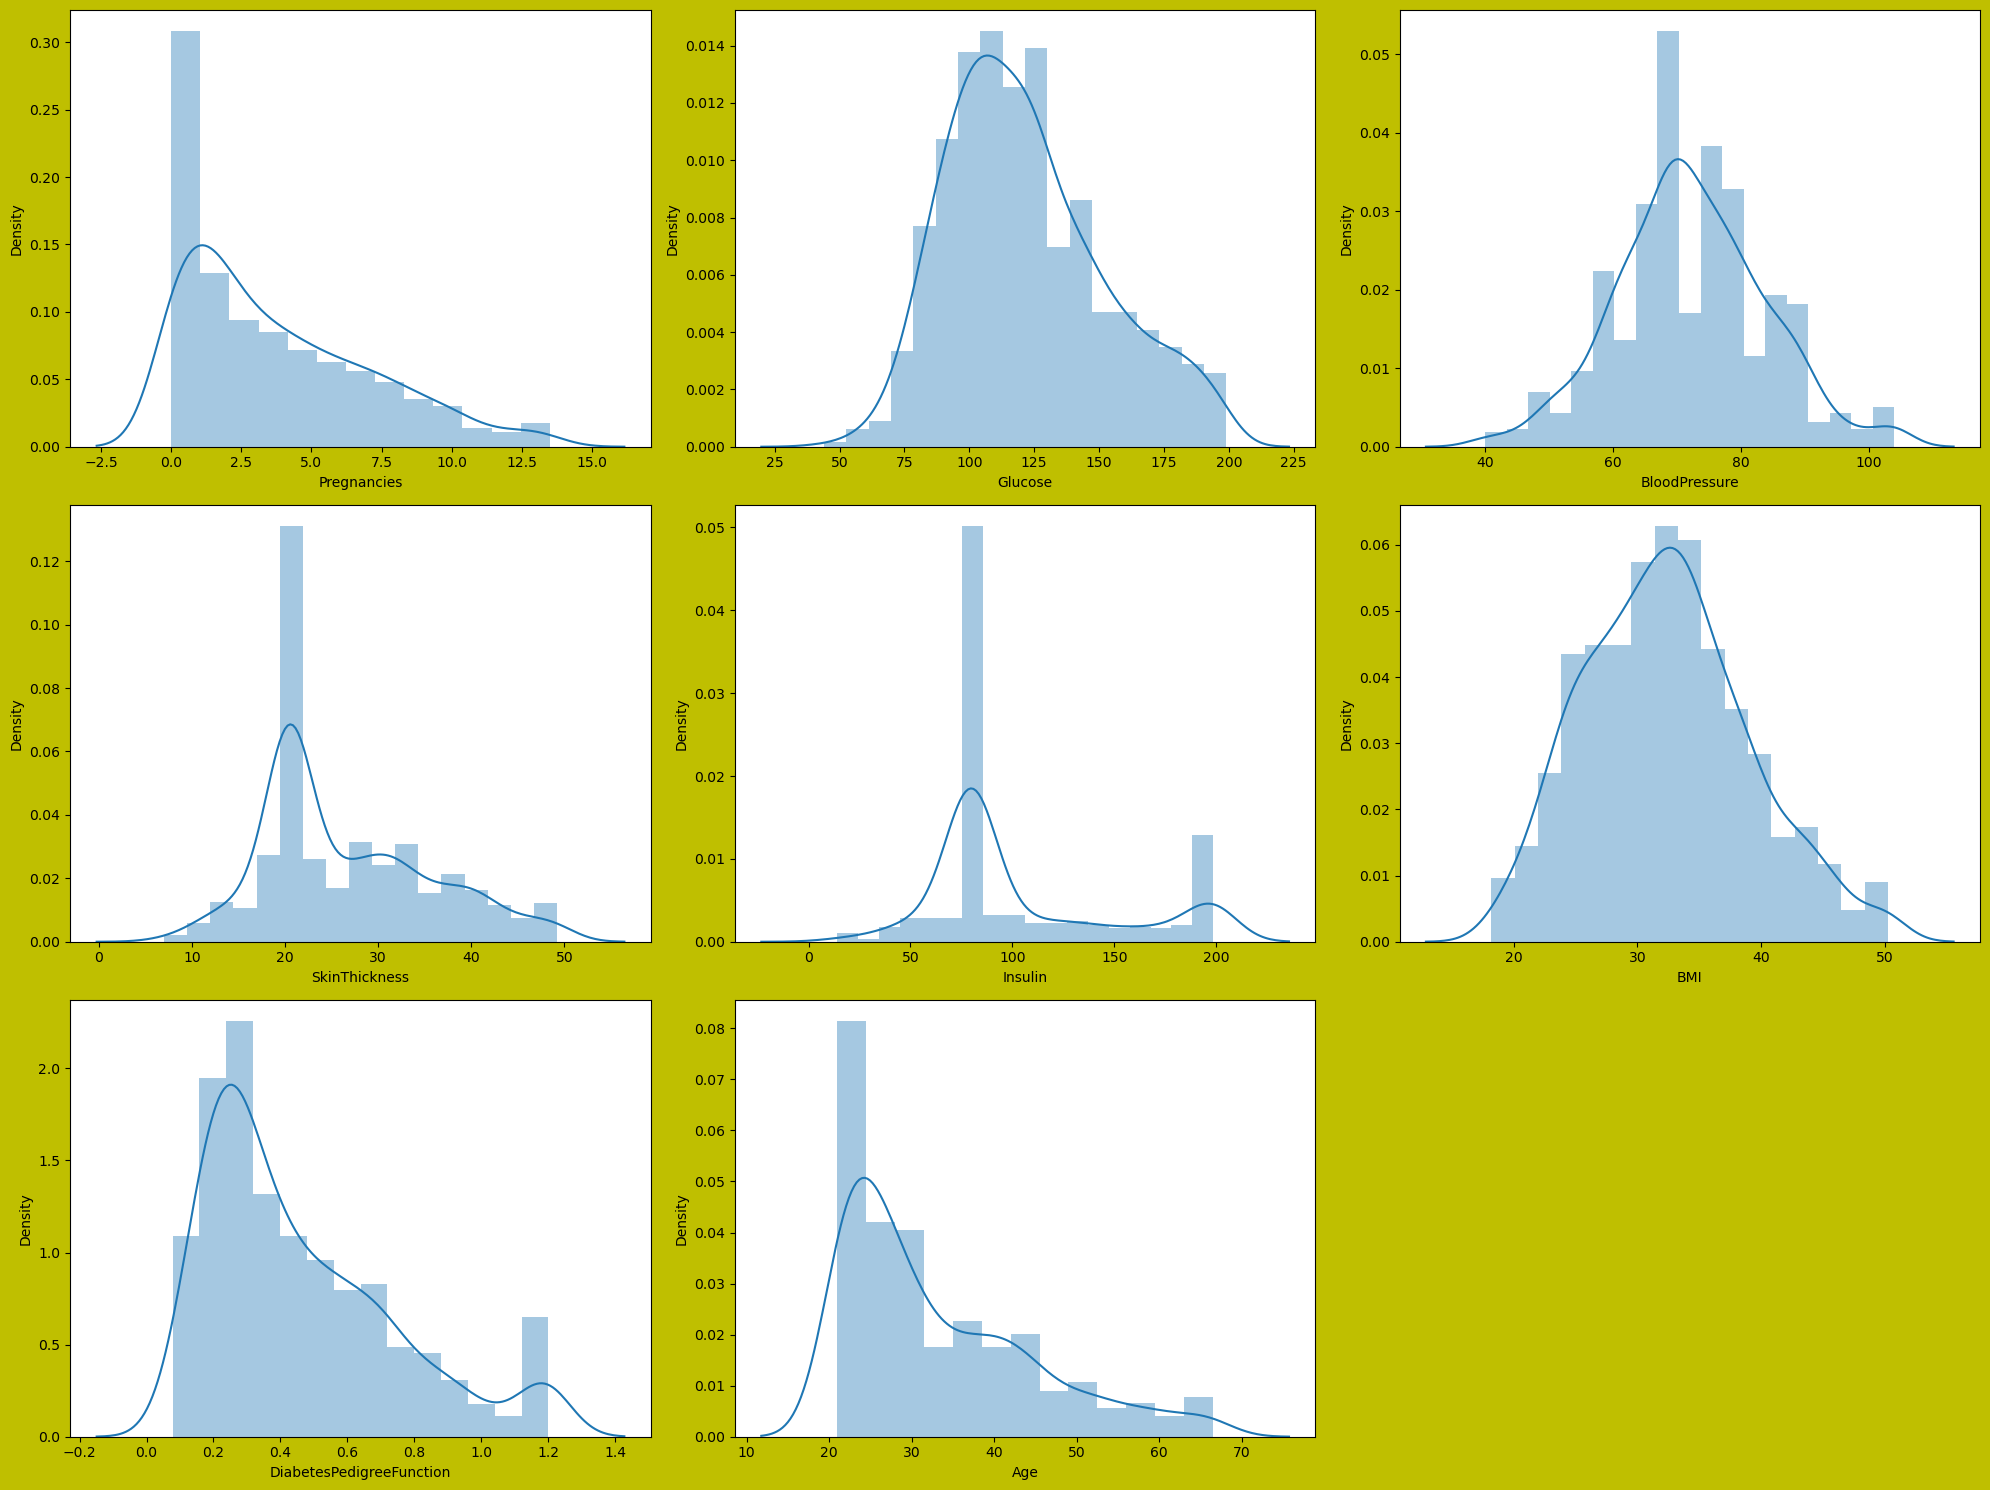

In [419]:
plt.figure(figsize=(20,15),facecolor='y')
graph=1
for i in data:
    if graph <=8:
        ax=plt.subplot(3,3,graph)
        sns.distplot(data[i])
        plt.xlabel(i)
    graph +=1
plt.tight_layout()

* Now the data looks much better now than before. We will start for analysis with this data now as we dont want to lose important information. If our model doesn't work with good accuracy then we comeback for more preprocessing.

# Dividing dataset into Features and Labels

In [420]:
X = data.drop(columns="Outcome")
y = data.Outcome

* Checking relationship between Features and Target variables

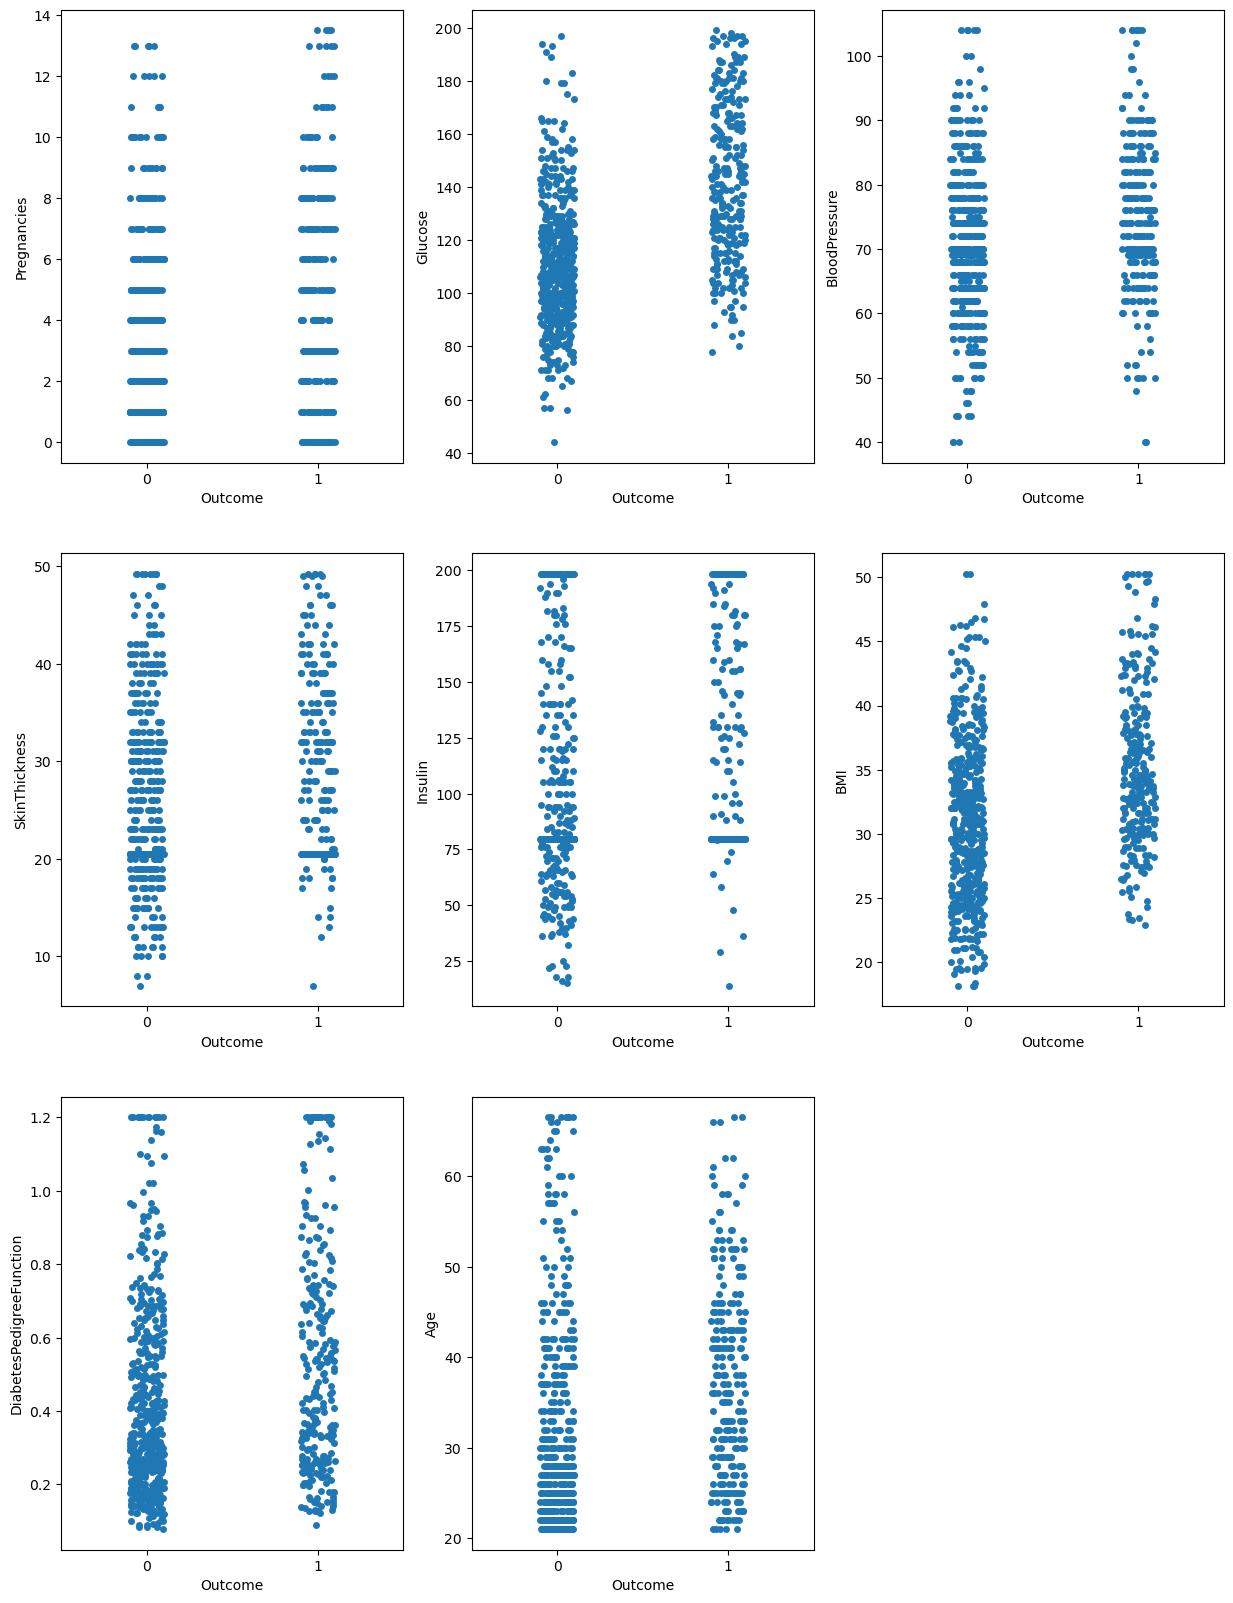

In [421]:
#Lets see how feature are related to Label:

plt.figure(figsize=(15,20))
plotnumber = 1
for i in X:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=X[i])
    plotnumber +=1
plt.show()

* Now Scale the Dataset through Standard Scaler

In [422]:
scaler = StandardScaler()
scaler

StandardScaler()

In [423]:
X_scaled=scaler.fit_transform(X)

* Checking Multi-Collinearity by using VIF (Variance Inflation Factor)

In [424]:
vif = pd.DataFrame()
vif['Vif']=[variance_inflation_factor(X_scaled,i) for i in range (X_scaled.shape[1])]

vif['Features']=X.columns

In [425]:
vif

,Vif,Features
0,1.441035,Pregnancies
1,1.339859,Glucose
2,1.255376,BloodPressure
3,1.511652,SkinThickness
4,1.315979,Insulin
5,1.576817,BMI
6,1.052224,DiabetesPedigreeFunction
7,1.628047,Age


* All the VIF are less then 5 and are very low, That means no multicollinearity is present.Now, we can go ahead with fitting our data to the model. Before that lets split our data in Train and Test.

In [426]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=190)

* Creating Model Object:

In [427]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [428]:
# Apply Logistic Regression and fit our training data ;

log_reg.fit(X_train,y_train)

LogisticRegression()

In [429]:
# Lets see how our model will perform on the test dataset.

y_pred = log_reg.predict(X_test)
y_pred


array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

# Some Metrices for Model Evaluation

In [430]:
# Model Accuracy

Accuracy = accuracy_score(y_test,y_pred)
Accuracy

0.796875

In [431]:
# Confusion Metrix

CM = confusion_matrix(y_test,y_pred)
CM

array([[118,  14],
       [ 25,  35]], dtype=int64)

In [432]:
# Precision Score 

Precision = precision_score(y_test,y_pred)
Precision

0.7142857142857143

In [433]:
# Recall Score

Recall = recall_score(y_test,y_pred)
Recall

0.5833333333333334

In [434]:
# Classification Report

CR = classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       132
           1       0.71      0.58      0.64        60

    accuracy                           0.80       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



# Thank You